In [176]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, PolynomialFeatures
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier, Lasso
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectFromModel
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.compose import ColumnTransformer
import time

In [177]:
df = pd.read_csv('data/heart.csv', sep = ',')


### Predicting whether a patient will develop heart disease.


Features
```
Exploring Data
# patient data:

1 - Age: age of the patient [years]
2 - Sex: sex of the patient [M: Male, F: Female]
3 - ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
4 - RestingBP: resting blood pressure [mm Hg]
5 - Cholesterol: serum cholesterol [mm/dl]
6 - FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
7 - RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
8 - MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
9 - ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
10 - Oldpeak: oldpeak = ST [Numeric value measured in depression]
12 - ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
13 - HeartDisease: output class [1: heart disease, 0: Normal]
```


In [178]:
df.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
df['Oldpeak'] = df['Oldpeak'].astype(int)

In [180]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [181]:
# identify all columns with null values.
null_columns = df.columns[df.isnull().any()].tolist()
print("Columns with null values:", null_columns)

# count null values
null_counts = df.isnull().sum()
print(null_counts)

Columns with null values: []
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [182]:
# counts and idenify all values within each features that do not have a number range such as MaxHR

sex_counts = df['Sex'].value_counts(dropna=False)
ChestPainType_counts = df['ChestPainType'].value_counts(dropna=False)
FastingBS_counts = df['FastingBS'].value_counts(dropna=False)
RestingECG_counts = df['RestingECG'].value_counts(dropna=False)
ExerciseAngina_counts = df['ExerciseAngina'].value_counts(dropna=False)
ST_Slope_counts = df['ST_Slope'].value_counts(dropna=False)
HeartDisease_counts = df['HeartDisease'].value_counts(dropna=False)

print(sex_counts)
print()
print(ChestPainType_counts)
print()
print(FastingBS_counts)
print()
print(RestingECG_counts)
print()
print(ExerciseAngina_counts)
print()
print(ST_Slope_counts)
print()
print(HeartDisease_counts)
print()



Sex
M    725
F    193
Name: count, dtype: int64

ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64

FastingBS
0    704
1    214
Name: count, dtype: int64

RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64

ExerciseAngina
N    547
Y    371
Name: count, dtype: int64

ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64

HeartDisease
1    508
0    410
Name: count, dtype: int64



In [183]:
# select min and max values of features with number range such as MaxHR

max_value = df['Age'].max()
min_value = df['Age'].min()
print(f"Age Max Value: {max_value}")
print(f"Age Min Value: {min_value}")
print()

max_value = df['RestingBP'].max()
min_value = df['RestingBP'].min()
print(f"RestingBP Max Value: {max_value}")
print(f"RestingBP Min Value: {min_value}")
print()

max_value = df['Cholesterol'].max()
min_value = df['Cholesterol'].min()
print(f"Cholesterol Max Value: {max_value}")
print(f"Cholesterol Min Value: {min_value}")
print()

max_value = df['MaxHR'].max()
min_value = df['MaxHR'].min()
print(f"MaxHR Max Value: {max_value}")
print(f"MaxHR Min Value: {min_value}")
print()

max_value = df['Oldpeak'].max()
min_value = df['Oldpeak'].min()
print(f"Oldpeak Max Value: {max_value}")
print(f"Oldpeak Min Value: {min_value}")


Age Max Value: 77
Age Min Value: 28

RestingBP Max Value: 200
RestingBP Min Value: 0

Cholesterol Max Value: 603
Cholesterol Min Value: 0

MaxHR Max Value: 202
MaxHR Min Value: 60

Oldpeak Max Value: 6.2
Oldpeak Min Value: -2.6


In [184]:
# RestingBP and Cholestorl appears to have 0 as values. will set as NULL and drop rows as to not skew the data.
df['RestingBP'] = df['RestingBP'].replace(0, pd.NA)
df['Cholesterol'] = df['Cholesterol'].replace(0, pd.NA)
df = df.dropna()

max_value = df['RestingBP'].max()
min_value = df['RestingBP'].min()
print(f"RestingBP Max Value: {max_value}")
print(f"RestingBP Min Value: {min_value}")
print()

max_value = df['Cholesterol'].max()
min_value = df['Cholesterol'].min()
print(f"Cholesterol Max Value: {max_value}")
print(f"Cholesterol Min Value: {min_value}")
print()



RestingBP Max Value: 200
RestingBP Min Value: 92

Cholesterol Max Value: 603
Cholesterol Min Value: 85



In [185]:
df.describe()

,Age,FastingBS,MaxHR,Oldpeak,HeartDisease
count,746.000000,746.000000,746.000000,746.000000,746.000000
mean,52.882038,0.167560,140.226542,0.901609,0.477212
std,9.505888,0.373726,24.524107,1.072861,0.499816
min,28.000000,0.000000,69.000000,-0.100000,0.000000
25%,46.000000,0.000000,122.000000,0.000000,0.000000
50%,54.000000,0.000000,140.000000,0.500000,0.000000
75%,59.000000,0.000000,160.000000,1.500000,1.000000
max,77.000000,1.000000,202.000000,6.200000,1.000000


Engineering Features

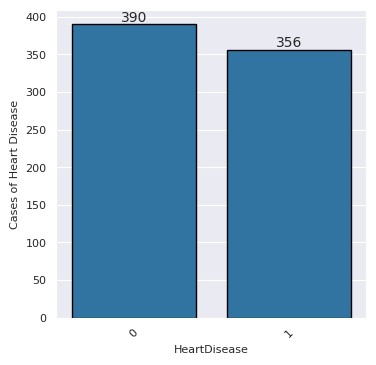

In [186]:

# based on graph. our dataset is balanced.

plt.figure(figsize = (4, 4))
ax=sns.countplot(data=df, x=df.HeartDisease, ec='black')
sns.set_style('darkgrid')
for cont in ax.containers:
    ax.bar_label(cont)
plt.ylabel('Cases of Heart Disease', size=8)
plt.yticks(size=8)
plt.xlabel('HeartDisease', size=8)
plt.xticks(size=8)
plt.xticks(rotation=45)
plt.show()
pd.reset_option('display.max_columns', 0)




<Axes: >

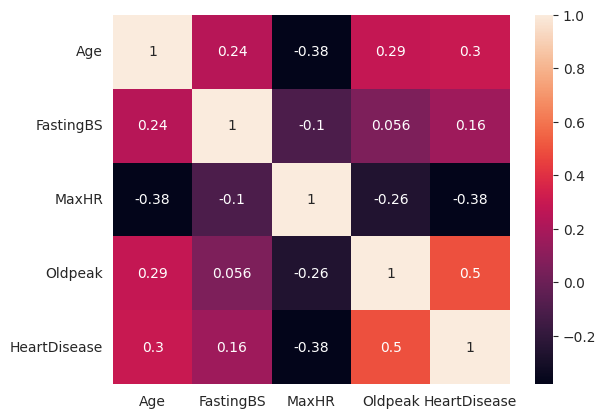

In [187]:
# Idenfity fields to see what highest correlation to heart disease.
# Correlations to heart disease shows that Old Peak and Age are the two features that are most related to heart disease.

corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True)

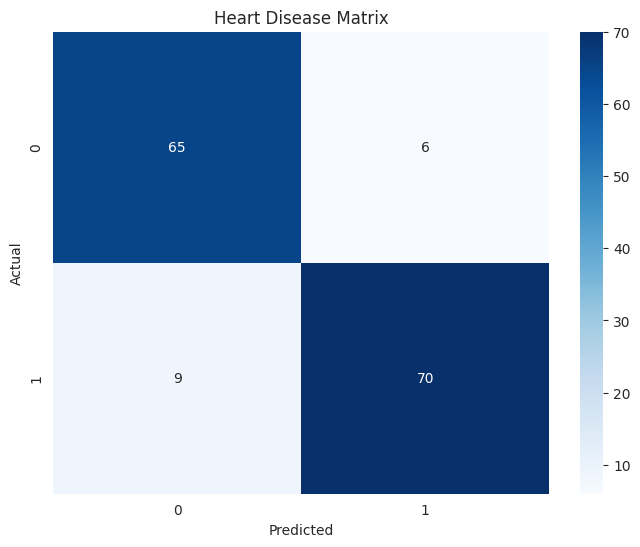

In [207]:
# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Heart Disease Matrix')
plt.show()


Modeling

In [214]:
# Define features (X) and target (y)
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

# Select features by datatype.
# Scale and encode transformation.
selector = make_column_selector(dtype_include=object)
transformer = make_column_transformer((OneHotEncoder(drop = 'first', handle_unknown='ignore'), selector),
                                     remainder = StandardScaler())
# ----------------------------------------------------------------------------------
categorical_columns = X.select_dtypes(include=['object']).columns.tolist()
numerical_columns = X.select_dtypes(include=['float64', 'int64']).columns.tolist()
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_columns)
    ])



In [215]:
# Split data into testing and training datasets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [216]:
# Similar to the bar chart above, the dataset is balanced.
y_test.value_counts(normalize = True)

,proportion
HeartDisease,
1,0.526667
0,0.473333


In [218]:
# logicistic Regression model yields a accuracy score of .8866
extractor = SelectFromModel(LogisticRegression(penalty='l1', solver = 'liblinear' ,random_state = 42))
lgr_pipe = Pipeline([('transformer', transformer),
                    ('selector', extractor),
                    ('lgr', LogisticRegression(random_state=42, max_iter = 1000))])

lgr_pipe.fit(X_train, y_train)

lgr_score = lgr_pipe.score(X_test, y_test)

print(lgr_score)


0.8866666666666667


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2, 3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [227]:
models = {
    'knn': (KNeighborsClassifier(), {'knn__n_neighbors': [5]}),
    'logisticregression': (LogisticRegression(max_iter=100), {'logisticregression__C': [1]}),
    'svc': (SVC(), {'svc__C': [1], 'svc__kernel': ['rbf']}),
    'decisiontreeclassifier': (DecisionTreeClassifier(), {'decisiontreeclassifier__max_depth': [None]})
}

In [246]:
results = []

for name, (model, params) in models.items():
    # Create a pipeline
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        (name, model)
    ])

    # Perform grid search
    grid_search = GridSearchCV(pipeline, param_grid=params, cv=5, n_jobs=-1)

    # Fit the model and time it
    start_time = time.time()
    grid_search.fit(X_train, y_train)
    fit_time = (time.time() - start_time) / len(grid_search.cv_results_['mean_fit_time'])

    # Get the best estimator
    best_model = grid_search.best_estimator_

    # Evaluate on training and test sets
    train_score = best_model.score(X_train, y_train)
    test_score = best_model.score(X_test, y_test)

    # Append the results
    results.append([name, train_score, test_score, fit_time])

# Create the results DataFrame
results_df = pd.DataFrame(results, columns=['model', 'train accruracy score', 'test accuracy score', 'time'])
results_df.set_index('model', inplace=True)

results_df

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2, 3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2, 3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2, 3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2, 3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


,train accuracy score,test accuracy score,time
model,,,
knn,0.884228,0.866667,0.154819
logisticregression,0.875839,0.886667,0.173153
svc,0.904362,0.880000,0.221275
decisiontreeclassifier,1.000000,0.820000,0.154897


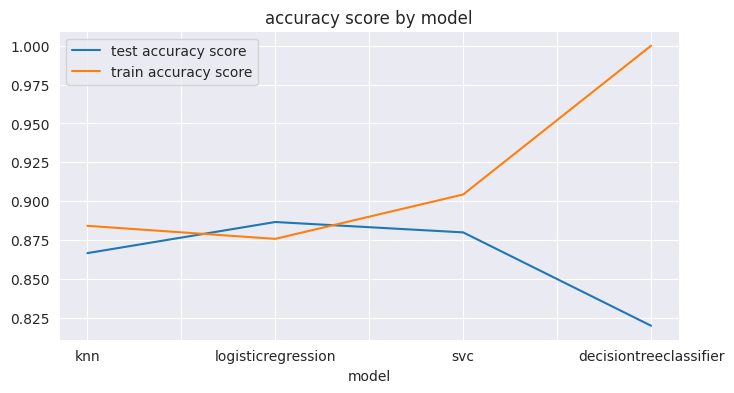

In [248]:
# based on both training and test scores merried with time, the best model used is knn.

from matplotlib import pyplot as plt
results_df['test accuracy score'].plot(kind='line', figsize=(8, 4), title='test accuracy score')
results_df['train accuracy score'].plot(kind='line', figsize=(8, 4), title='accuracy score by model')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.legend()

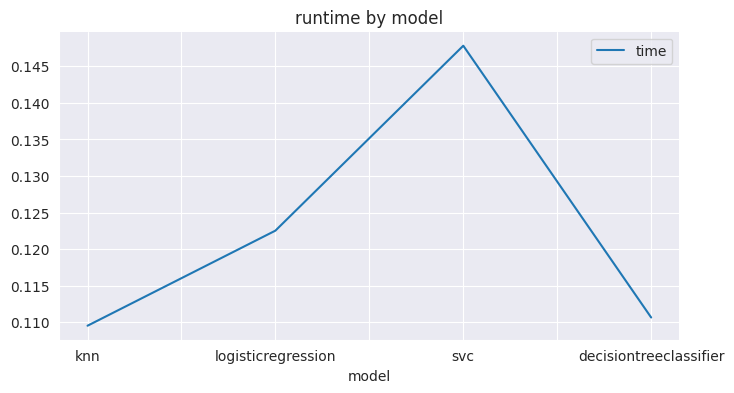

In [242]:
from matplotlib import pyplot as plt
results_df['time'].plot(kind='line', figsize=(8, 4), title='runtime by model')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.legend()

Improving the Model

In [249]:
# Appears that ChestPainType and Sex highly affects the heart failure feature while RestingECG, RestingBP and MaxHR are less likely to affect the target feature.
feature_names = lgr_pipe.named_steps['transformer'].get_feature_names_out()
selected_features =feature_names[ [int(i[1:]) for i in lgr_pipe.named_steps['selector'].get_feature_names_out()]]
clean_names = [i.split('__')[-1] for i in selected_features]
coef_df = pd.DataFrame({'feature': clean_names, 'coefs': lgr_pipe.named_steps['lgr'].coef_[0]})
coef_df['coefs'] = coef_df['coefs'].apply(abs)
coef_df = coef_df.sort_values(by = 'coefs', ascending = False)

In [250]:
coef_df.head()

,feature,coefs
0,Sex_M,1.336476
3,ChestPainType_TA,1.329710
2,ChestPainType_NAP,1.245542
1,ChestPainType_ATA,1.182231
27,ST_Slope_Flat,1.159425


In [251]:
coef_df.tail()

,feature,coefs
25,RestingECG_ST,0.330670
4,RestingBP_110,0.314852
29,Age,0.235787
24,RestingECG_Normal,0.227570
30,MaxHR,0.114585


In [256]:
models = {
    'knn': (KNeighborsClassifier(), {'knn__n_neighbors': [3, 5, 7]}),
    'logisticregression': (LogisticRegression(max_iter=1000), {'logisticregression__C': [0.1, 1, 10]}),
    'svc': (SVC(), {'svc__C': [0.1, 1, 10], 'svc__kernel': ['linear', 'rbf']}),
    'decisiontreeclassifier': (DecisionTreeClassifier(), {'decisiontreeclassifier__max_depth': [5, 10, 15]})
}

results = []

for name, (model, params) in models.items():
    # Create a pipeline
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        (name, model)
    ])

    # Perform grid search
    grid_search = GridSearchCV(pipeline, param_grid=params, cv=5, n_jobs=-1)

    # Fit the model and time it
    start_time = time.time()
    grid_search.fit(X_train, y_train)
    fit_time = (time.time() - start_time) / len(grid_search.cv_results_['mean_fit_time'])

    # Get the best estimator
    best_model = grid_search.best_estimator_

    # Evaluate on training and test sets
    train_score = best_model.score(X_train, y_train)
    test_score = best_model.score(X_test, y_test)

    # Append the results
    results.append([name, train_score, test_score, fit_time])

# Create the results DataFrame
results_df1 = pd.DataFrame(results, columns=['model', 'train accuracy score', 'test accuracy score', 'time'])
results_df1.set_index('model', inplace=True)

# Based on comparison using tuning the classifers for each model.
## The logistic regression model is the most accurate when predicting with test scores at .8933 although svc has a better train score.
## Test score is crucial as it provides a better estimate of the model's performance in real-world scenarios with unseen data.
results_df1

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2, 3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2, 3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2, 3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [2, 3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


,train accuracy score,test accuracy score,time
model,,,
knn,0.865772,0.860000,0.155018
logisticregression,0.854027,0.893333,0.187075
svc,0.904362,0.880000,0.189232
decisiontreeclassifier,0.895973,0.820000,0.136952


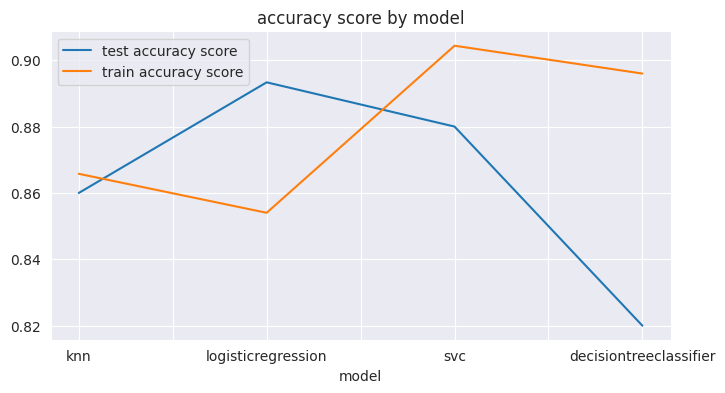

In [257]:
# based on both training and test scores merried with time, the best model used is logistic regression.

from matplotlib import pyplot as plt
results_df1['test accuracy score'].plot(kind='line', figsize=(8, 4), title='test accuracy score')
results_df1['train accuracy score'].plot(kind='line', figsize=(8, 4), title='accuracy score by model')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.legend()

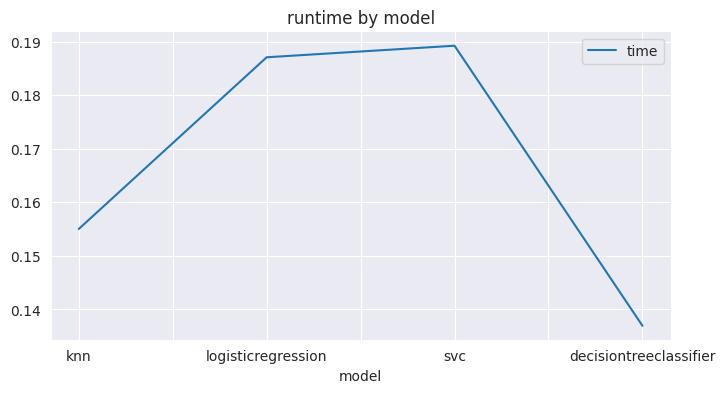

In [258]:
# decision tree model is the quickest but also yields the least accurate test score.

from matplotlib import pyplot as plt
results_df1['time'].plot(kind='line', figsize=(8, 4), title='runtime by model')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.legend()